# Pre-Processing of Text Data

*Authors*   
Nik Bear Brown 



## Abstract

Text preprocessing is a crucial step in natural language processing (NLP) that involves transforming raw text data into a structured format suitable for analysis. 

Text data frequently contains several types of noise, including punctuation, emotions, and text in various cases. These noise elements may adversely impact the performance of NLP models. To address this, text preprocessing techniques are employed to remove these noise elements and produce a clean dataset. 

Machines cannot understand words, they require numbers so we need to convert text to numbers in an efficient manner. 
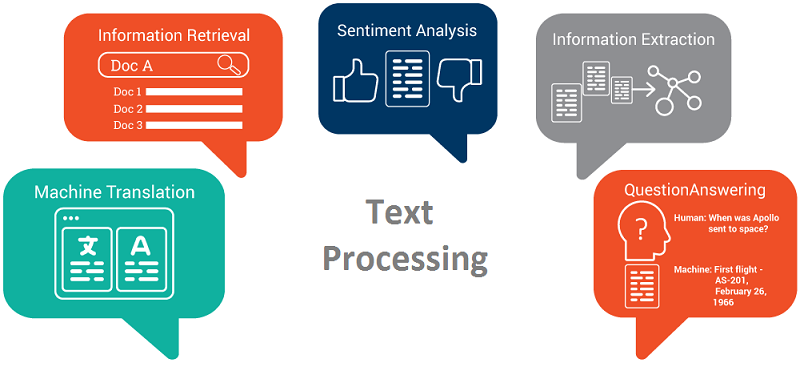

## Table of Contents

* Importing Libraries
* Expand Contraction
* Tokenization
* Convert to Lower Case
* Remove words containing digits
* Remove Punctuations
* Remove stopwords
* Stemming/Lemmatization
* Conclusion


## Importing the Required Libraries

In [1]:
# Installing Contractions
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 8.6 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import nltk
import string
import re
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

Reading a dataset of emails, which are classified as spam or not, 


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/nikbearbrown/INFO_7390_Art_and_Science_of_Data/main/CSV/DataSphere_main_emails.csv')
df=df[["text","spam"]].copy()

Displaying a sample email text

In [4]:
df['text'][0]

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

## Expand Contraction
Contracted words are a common feature of natural language, especially in informal settings such as social media or messaging platforms.

Contractions are shortened versions of words or phrases that are formed by combining two words and replacing one or more letters with an apostrophe. 
Examples of contractions include:
* "can't" (from "cannot")
* "won't" (from "will not")
* "it's" (from "it is" or "it has")
* "shouldn't" (from "should not")
* "didn't" (from "did not")
* "you'll" (from "you will")

It will be beneficial to expand contractions to help with language understanding for which we will use the **Contractions** library.



In [5]:
df['contractions'] = df['text'].apply(lambda x: [contractions.fix(word) for word in x.split()])
df['no_contractions'] = [' '.join(map(str, l)) for l in df['contractions']]
df.drop('contractions',axis=1,inplace=True)
df.head()

,text,spam,no_contractions
0,Subject: naturally irresistible your corporate...,1,Subject: naturally irresistible your corporate...
1,Subject: the stock trading gunslinger fanny i...,1,Subject: the stock trading gunslinger fanny is...
2,Subject: unbelievable new homes made easy im ...,1,Subject: unbelievable new homes made easy i am...
3,Subject: 4 color printing special request add...,1,Subject: 4 color printing special request addi...
4,"Subject: do not have money , get software cds ...",1,"Subject: do not have money , get software cds ..."


## Tokenization
Tokenization is the process of breaking down text into individual words, phrases, or other meaningful elements, called tokens.

We will use **NLTK.word_tokenize()** function to create a new column named “tokenized”.


In [6]:
nltk.download('punkt')
df['tokenized'] = df['no_contractions'].apply(word_tokenize)
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chava\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,text,spam,no_contractions,tokenized
0,Subject: naturally irresistible your corporate...,1,Subject: naturally irresistible your corporate...,"[Subject, :, naturally, irresistible, your, co..."
1,Subject: the stock trading gunslinger fanny i...,1,Subject: the stock trading gunslinger fanny is...,"[Subject, :, the, stock, trading, gunslinger, ..."
2,Subject: unbelievable new homes made easy im ...,1,Subject: unbelievable new homes made easy i am...,"[Subject, :, unbelievable, new, homes, made, e..."
3,Subject: 4 color printing special request add...,1,Subject: 4 color printing special request addi...,"[Subject, :, 4, color, printing, special, requ..."
4,"Subject: do not have money , get software cds ...",1,"Subject: do not have money , get software cds ...","[Subject, :, do, not, have, money, ,, get, sof..."


## Convert to Lower Case

All the alphabetic characters in a text are transformed to their corresponding lower case representation to reduce the vocabulary size and avoid duplication of words during text analysis.

In [7]:
df['lower'] = df['tokenized'].apply(lambda x: [text.lower() for text in x])
df.head()

,text,spam,no_contractions,tokenized,lower
0,Subject: naturally irresistible your corporate...,1,Subject: naturally irresistible your corporate...,"[Subject, :, naturally, irresistible, your, co...","[subject, :, naturally, irresistible, your, co..."
1,Subject: the stock trading gunslinger fanny i...,1,Subject: the stock trading gunslinger fanny is...,"[Subject, :, the, stock, trading, gunslinger, ...","[subject, :, the, stock, trading, gunslinger, ..."
2,Subject: unbelievable new homes made easy im ...,1,Subject: unbelievable new homes made easy i am...,"[Subject, :, unbelievable, new, homes, made, e...","[subject, :, unbelievable, new, homes, made, e..."
3,Subject: 4 color printing special request add...,1,Subject: 4 color printing special request addi...,"[Subject, :, 4, color, printing, special, requ...","[subject, :, 4, color, printing, special, requ..."
4,"Subject: do not have money , get software cds ...",1,"Subject: do not have money , get software cds ...","[Subject, :, do, not, have, money, ,, get, sof...","[subject, :, do, not, have, money, ,, get, sof..."


## Remove words containing digits

Eliminating words that contain numeric characters from text analysis to reduce noise and improve the accuracy of language models.

We will eliminate these words using **Regular Expression**.

In [8]:
df['no_num'] = df['lower'].apply(lambda x: [re.sub(r'\w*\d\w*','',text) for text in x])
df.head()

,text,spam,no_contractions,tokenized,lower,no_num
0,Subject: naturally irresistible your corporate...,1,Subject: naturally irresistible your corporate...,"[Subject, :, naturally, irresistible, your, co...","[subject, :, naturally, irresistible, your, co...","[subject, :, naturally, irresistible, your, co..."
1,Subject: the stock trading gunslinger fanny i...,1,Subject: the stock trading gunslinger fanny is...,"[Subject, :, the, stock, trading, gunslinger, ...","[subject, :, the, stock, trading, gunslinger, ...","[subject, :, the, stock, trading, gunslinger, ..."
2,Subject: unbelievable new homes made easy im ...,1,Subject: unbelievable new homes made easy i am...,"[Subject, :, unbelievable, new, homes, made, e...","[subject, :, unbelievable, new, homes, made, e...","[subject, :, unbelievable, new, homes, made, e..."
3,Subject: 4 color printing special request add...,1,Subject: 4 color printing special request addi...,"[Subject, :, 4, color, printing, special, requ...","[subject, :, 4, color, printing, special, requ...","[subject, :, , color, printing, special, reque..."
4,"Subject: do not have money , get software cds ...",1,"Subject: do not have money , get software cds ...","[Subject, :, do, not, have, money, ,, get, sof...","[subject, :, do, not, have, money, ,, get, sof...","[subject, :, do, not, have, money, ,, get, sof..."


## Remove Punctuations

Punctuation is often removed to simplify the analysis, and reduce the vocabulary size while preserving the meaningful content of the text.

We will use the **punctuation** library from the **String** package.

In [9]:
punc = string.punctuation
df['no_punc'] = df['no_num'].apply(lambda x: [text for text in x if text not in punc])
df.head()

,text,spam,no_contractions,tokenized,lower,no_num,no_punc
0,Subject: naturally irresistible your corporate...,1,Subject: naturally irresistible your corporate...,"[Subject, :, naturally, irresistible, your, co...","[subject, :, naturally, irresistible, your, co...","[subject, :, naturally, irresistible, your, co...","[subject, naturally, irresistible, your, corpo..."
1,Subject: the stock trading gunslinger fanny i...,1,Subject: the stock trading gunslinger fanny is...,"[Subject, :, the, stock, trading, gunslinger, ...","[subject, :, the, stock, trading, gunslinger, ...","[subject, :, the, stock, trading, gunslinger, ...","[subject, the, stock, trading, gunslinger, fan..."
2,Subject: unbelievable new homes made easy im ...,1,Subject: unbelievable new homes made easy i am...,"[Subject, :, unbelievable, new, homes, made, e...","[subject, :, unbelievable, new, homes, made, e...","[subject, :, unbelievable, new, homes, made, e...","[subject, unbelievable, new, homes, made, easy..."
3,Subject: 4 color printing special request add...,1,Subject: 4 color printing special request addi...,"[Subject, :, 4, color, printing, special, requ...","[subject, :, 4, color, printing, special, requ...","[subject, :, , color, printing, special, reque...","[subject, color, printing, special, request, a..."
4,"Subject: do not have money , get software cds ...",1,"Subject: do not have money , get software cds ...","[Subject, :, do, not, have, money, ,, get, sof...","[subject, :, do, not, have, money, ,, get, sof...","[subject, :, do, not, have, money, ,, get, sof...","[subject, do, not, have, money, get, software,..."


## Remove Stopwords

Process of eliminating common words such as "the", "a", "an", and "in" from text to reduce the dimensionality of the data, and to focus on the more meaningful words that carry the essence of the text.

We will use the **stopwords** library from the nltk module.

In [10]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['stopwords_removed'] = df['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chava\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,spam,no_contractions,tokenized,lower,no_num,no_punc,stopwords_removed
0,Subject: naturally irresistible your corporate...,1,Subject: naturally irresistible your corporate...,"[Subject, :, naturally, irresistible, your, co...","[subject, :, naturally, irresistible, your, co...","[subject, :, naturally, irresistible, your, co...","[subject, naturally, irresistible, your, corpo...","[subject, naturally, irresistible, corporate, ..."
1,Subject: the stock trading gunslinger fanny i...,1,Subject: the stock trading gunslinger fanny is...,"[Subject, :, the, stock, trading, gunslinger, ...","[subject, :, the, stock, trading, gunslinger, ...","[subject, :, the, stock, trading, gunslinger, ...","[subject, the, stock, trading, gunslinger, fan...","[subject, stock, trading, gunslinger, fanny, m..."
2,Subject: unbelievable new homes made easy im ...,1,Subject: unbelievable new homes made easy i am...,"[Subject, :, unbelievable, new, homes, made, e...","[subject, :, unbelievable, new, homes, made, e...","[subject, :, unbelievable, new, homes, made, e...","[subject, unbelievable, new, homes, made, easy...","[subject, unbelievable, new, homes, made, easy..."
3,Subject: 4 color printing special request add...,1,Subject: 4 color printing special request addi...,"[Subject, :, 4, color, printing, special, requ...","[subject, :, 4, color, printing, special, requ...","[subject, :, , color, printing, special, reque...","[subject, color, printing, special, request, a...","[subject, color, printing, special, request, a..."
4,"Subject: do not have money , get software cds ...",1,"Subject: do not have money , get software cds ...","[Subject, :, do, not, have, money, ,, get, sof...","[subject, :, do, not, have, money, ,, get, sof...","[subject, :, do, not, have, money, ,, get, sof...","[subject, do, not, have, money, get, software,...","[subject, money, get, software, cds, software,..."


## Stemming or Lemmatization
Stemming and lemmatization are two techniques used in NLP to normalize words by reducing them to their base or root form; stemming chops off the end of words, while lemmatization uses a vocabulary and morphological analysis to reduce words to their canonical form.

* **Stemming**: The stem of "running" is "run". Using a stemming algorithm, "running", "runs", and "runner" would all be reduced to the stem "run".
* **Lemmatization**: The lemma of "running" is "run". Using a lemmatization algorithm, "running" and "runs" would be reduced to "run", while "runner" would be reduced to "run" as well, but only if the context suggests that it is being used as a verb.

We will apply parts of **speech tags**, in other words, determine the part of speech (ie. noun, verb, adverb, etc.) for each word.

In [11]:
nltk.download('averaged_perceptron_tagger')
df['pos_tags'] = df['stopwords_removed'].apply(nltk.tag.pos_tag)
df.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\chava\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,text,spam,no_contractions,tokenized,lower,no_num,no_punc,stopwords_removed,pos_tags
0,Subject: naturally irresistible your corporate...,1,Subject: naturally irresistible your corporate...,"[Subject, :, naturally, irresistible, your, co...","[subject, :, naturally, irresistible, your, co...","[subject, :, naturally, irresistible, your, co...","[subject, naturally, irresistible, your, corpo...","[subject, naturally, irresistible, corporate, ...","[(subject, JJ), (naturally, RB), (irresistible..."
1,Subject: the stock trading gunslinger fanny i...,1,Subject: the stock trading gunslinger fanny is...,"[Subject, :, the, stock, trading, gunslinger, ...","[subject, :, the, stock, trading, gunslinger, ...","[subject, :, the, stock, trading, gunslinger, ...","[subject, the, stock, trading, gunslinger, fan...","[subject, stock, trading, gunslinger, fanny, m...","[(subject, JJ), (stock, NN), (trading, NN), (g..."
2,Subject: unbelievable new homes made easy im ...,1,Subject: unbelievable new homes made easy i am...,"[Subject, :, unbelievable, new, homes, made, e...","[subject, :, unbelievable, new, homes, made, e...","[subject, :, unbelievable, new, homes, made, e...","[subject, unbelievable, new, homes, made, easy...","[subject, unbelievable, new, homes, made, easy...","[(subject, JJ), (unbelievable, JJ), (new, JJ),..."
3,Subject: 4 color printing special request add...,1,Subject: 4 color printing special request addi...,"[Subject, :, 4, color, printing, special, requ...","[subject, :, 4, color, printing, special, requ...","[subject, :, , color, printing, special, reque...","[subject, color, printing, special, request, a...","[subject, color, printing, special, request, a...","[(subject, JJ), (color, NN), (printing, NN), (..."
4,"Subject: do not have money , get software cds ...",1,"Subject: do not have money , get software cds ...","[Subject, :, do, not, have, money, ,, get, sof...","[subject, :, do, not, have, money, ,, get, sof...","[subject, :, do, not, have, money, ,, get, sof...","[subject, do, not, have, money, get, software,...","[subject, money, get, software, cds, software,...","[(subject, JJ), (money, NN), (get, NN), (softw..."


We are going to be using NLTK’s word lemmatizer which needs the parts of speech tags to be converted to wordnet’s format.

In [12]:
nltk.download('wordnet')
nltk.download('omw-1.4')
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
df['wordnet_pos'] = df['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chava\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\chava\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,text,spam,no_contractions,tokenized,lower,no_num,no_punc,stopwords_removed,pos_tags,wordnet_pos
0,Subject: naturally irresistible your corporate...,1,Subject: naturally irresistible your corporate...,"[Subject, :, naturally, irresistible, your, co...","[subject, :, naturally, irresistible, your, co...","[subject, :, naturally, irresistible, your, co...","[subject, naturally, irresistible, your, corpo...","[subject, naturally, irresistible, corporate, ...","[(subject, JJ), (naturally, RB), (irresistible...","[(subject, a), (naturally, r), (irresistible, ..."
1,Subject: the stock trading gunslinger fanny i...,1,Subject: the stock trading gunslinger fanny is...,"[Subject, :, the, stock, trading, gunslinger, ...","[subject, :, the, stock, trading, gunslinger, ...","[subject, :, the, stock, trading, gunslinger, ...","[subject, the, stock, trading, gunslinger, fan...","[subject, stock, trading, gunslinger, fanny, m...","[(subject, JJ), (stock, NN), (trading, NN), (g...","[(subject, a), (stock, n), (trading, n), (guns..."
2,Subject: unbelievable new homes made easy im ...,1,Subject: unbelievable new homes made easy i am...,"[Subject, :, unbelievable, new, homes, made, e...","[subject, :, unbelievable, new, homes, made, e...","[subject, :, unbelievable, new, homes, made, e...","[subject, unbelievable, new, homes, made, easy...","[subject, unbelievable, new, homes, made, easy...","[(subject, JJ), (unbelievable, JJ), (new, JJ),...","[(subject, a), (unbelievable, a), (new, a), (h..."
3,Subject: 4 color printing special request add...,1,Subject: 4 color printing special request addi...,"[Subject, :, 4, color, printing, special, requ...","[subject, :, 4, color, printing, special, requ...","[subject, :, , color, printing, special, reque...","[subject, color, printing, special, request, a...","[subject, color, printing, special, request, a...","[(subject, JJ), (color, NN), (printing, NN), (...","[(subject, a), (color, n), (printing, n), (spe..."
4,"Subject: do not have money , get software cds ...",1,"Subject: do not have money , get software cds ...","[Subject, :, do, not, have, money, ,, get, sof...","[subject, :, do, not, have, money, ,, get, sof...","[subject, :, do, not, have, money, ,, get, sof...","[subject, do, not, have, money, get, software,...","[subject, money, get, software, cds, software,...","[(subject, JJ), (money, NN), (get, NN), (softw...","[(subject, a), (money, n), (get, n), (software..."


We will apply NLTK’s word lemmatizer within our trusty list comprehension. Notice, the lemmatizer function requires two parameters the word and its tag (in wordnet form).

In [ ]:
wnl = WordNetLemmatizer()
df['lemmatized'] = df['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])

Displaying the original text and processed data

In [ ]:
df[['text','lemmatized']]

## Conclusion

Pre-processing of text data is an essential step in natural language processing (NLP) that involves cleaning and transforming raw text data into a format that is suitable for analysis by NLP algorithms. Techniques such as tokenization, converting to lower case, removing digits and punctuations, and eliminating stopwords can help reduce the dimensionality of the data and improve the accuracy of language models. Stemming and lemmatization can further normalize the text data by reducing words to their base or root form. 

Overall, pre-processing plays a crucial role in preparing text data for various NLP tasks such as sentiment analysis, text classification, and language translation.

## References
* Pre-processing using Natural Language Toolkit: https://www.nltk.org/

## License  

All code in this notebook is available as open source through the MIT license.

All text and images are free to use under the Creative Commons Attribution 3.0 license.  https://creativecommons.org/licenses/by/3.0/us/

These licenses let people distribute, remix, tweak, and build upon the work, even commercially, as long as they give credit for the original creation.

Copyright 2023 AI Skunks  https://github.com/aiskunks

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.